# Egyptian Real Estate Listings Analysis

This project analyzes a dataset of **real estate listings in Egypt** to explore property characteristics, pricing trends, and regional differences.  
The workflow includes data loading, cleaning, exploration, and visualization to extract insights from the housing market.

---

## 1. Importing Libraries

We start by importing the essential Python libraries:

- **NumPy (`numpy`)** → For numerical computations and mathematical operations.  
- **Pandas (`pandas`)** → For handling, cleaning, and analyzing tabular data.  
- **Matplotlib (`matplotlib.pyplot`)** → For building basic visualizations.  
- **Seaborn (`seaborn`)** → For advanced and more aesthetic statistical plots.  
- **Missingno (`missingno`)** → For visualizing and diagnosing missing data.  

Additionally, we set the Seaborn plotting style to **`whitegrid`** for a cleaner look.

---

## 2. Loading the Dataset

The dataset is stored in a CSV file: **`egypt_real_estate_listings.csv`**.  
We load it into a DataFrame using `pandas.read_csv()`. To preserve the raw data, we create a **working copy** (`df`) that will be used in the analysis.

---

## 3. Initial Data Exploration

Before diving into analysis, we explore the dataset to understand its structure:

- **Shape (`df.shape`)** → Displays the number of rows (observations) and columns (features).  
- **Column names (`df.columns`)** → Lists all variables available in the dataset.  
- **Info (`df.info()`)** → Provides data types, non-null counts, and memory usage.  
- **Statistical summary (`df.describe().T`)** → Offers descriptive statistics (mean, standard deviation, min, max, etc.) for numerical columns.  
- **Preview (`df.head()`)** → Shows the first 5 records of the dataset for a quick glance.  

These steps help identify the dataset’s size, the type of data it contains, and potential issues such as missing values or inconsistent data types.


In [38]:
# Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
sns.set_style('whitegrid')

In [39]:
# Load dataset 
df1 = pd.read_csv('Data/egypt_real_estate_listings.csv')

In [40]:
# make a copy of the dataset
df = df1.copy()

In [41]:
# Show the shape of the dataset
df.shape

(19924, 11)

In [42]:
# Show the columns
df.columns

Index(['url', 'price', 'description', 'location', 'type', 'size', 'bedrooms',
       'bathrooms', 'available_from', 'payment_method', 'down_payment'],
      dtype='object')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19924 entries, 0 to 19923
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   url             19924 non-null  object
 1   price           19385 non-null  object
 2   description     19846 non-null  object
 3   location        19833 non-null  object
 4   type            19847 non-null  object
 5   size            19847 non-null  object
 6   bedrooms        19780 non-null  object
 7   bathrooms       19784 non-null  object
 8   available_from  19261 non-null  object
 9   payment_method  19383 non-null  object
 10  down_payment    5445 non-null   object
dtypes: object(11)
memory usage: 1.7+ MB


In [44]:
df.describe().T

,count,unique,top,freq
url,19924,19924,https://www.propertyfinder.eg/en/plp/buy/chale...,1
price,19385,4286,"10,000,000",307
description,19846,18130,Please Note Before Reading:\nThis is one of ma...,72
location,19833,1535,"Marassi, Sidi Abdel Rahman, North Coast",433
type,19847,17,Apartment,8355
size,19847,683,"1,507 sqft / 140 sqm",432
bedrooms,19780,18,3,4959
bathrooms,19784,16,3,6562
available_from,19261,353,1 Sep 2025,3254
payment_method,19383,2,Cash,15521


In [45]:
df.head()

,url,price,description,location,type,size,bedrooms,bathrooms,available_from,payment_method,down_payment
0,https://www.propertyfinder.eg/en/plp/buy/chale...,"8,000,000",OWN A CHALET IN EL GOUNA WITH A PRIME LOCATION...,"Swan Lake Gouna, Al Gouna, Hurghada, Red Sea",Chalet,732 sqft / 68 sqm,1+ Maid,1,31 Aug 2025,Cash,"1,200,000 EGP"
1,https://www.propertyfinder.eg/en/plp/buy/villa...,"25,000,000","For sale, a villa with immediate delivery in C...","Karmell, New Zayed City, Sheikh Zayed City, Giza",Villa,"2,368 sqft / 220 sqm",4,4,2 Sep 2025,Cash,"2,100,000 EGP"
2,https://www.propertyfinder.eg/en/plp/buy/chale...,"15,135,000","With a down payment of EGP 1,513,000, a fully ...","Azha North, Ras Al Hekma, North Coast",Chalet,"1,270 sqft / 118 sqm",2,2,19 Aug 2025,Cash,"1,513,000 EGP"
3,https://www.propertyfinder.eg/en/plp/buy/apart...,"12,652,000",Own an apartment in New Cairo with a minimal d...,"Taj City, 5th Settlement Compounds, The 5th Se...",Apartment,"1,787 sqft / 166 sqm",3,2,26 Aug 2025,Installments,"1,260,000 EGP"
4,https://www.propertyfinder.eg/en/plp/buy/villa...,"45,250,000",Project: Granville\nLocation: Fifth Settlement...,"Granville, New Capital City, Cairo",Villa,"4,306 sqft / 400 sqm",7,7,2 Sep 2025,Cash,"2,262,500 EGP"


---

## 4. Missing Values Analysis

Handling missing data is a critical step in data preprocessing, as it can impact the accuracy and reliability of the analysis.  
We perform both **tabular** and **visual** inspections of missing values.

---

### 4.1 Missing Values Table

We create a summary table that shows:

- **Missing Values** → The total count of missing entries per column.  
- **Missing Percentage** → The proportion of missing values relative to the dataset size.  

This helps us identify which features require imputation, removal, or special handling.

---

### 4.2 Visualizing Missing Data

To better understand the distribution of missing values across the dataset, we use **Missingno (`msno`)** visualizations:

- **Bar Plot (`msno.bar`)**  
  Displays the number of non-missing and missing values for each column.  

- **Matrix Plot (`msno.matrix`)**  
  Provides a detailed view of the location and pattern of missing values within the dataset.  
  This is particularly useful to detect correlations or structures in the missingness.

These visual tools make it easier to decide on the appropriate data-cleaning strategy.


In [46]:
# Create a table for missing values with its percentage
missing_table = df.isnull().sum().to_frame(name='Missing Values').reset_index()
missing_table['Missing Percentage'] = (missing_table['Missing Values'] / df.shape[0] * 100).round(2)
missing_table[missing_table['Missing Values'] > 0]

,index,Missing Values,Missing Percentage
1,price,539,2.71
2,description,78,0.39
3,location,91,0.46
4,type,77,0.39
5,size,77,0.39
6,bedrooms,144,0.72
7,bathrooms,140,0.70
8,available_from,663,3.33
9,payment_method,541,2.72
10,down_payment,14479,72.67


<Axes: >

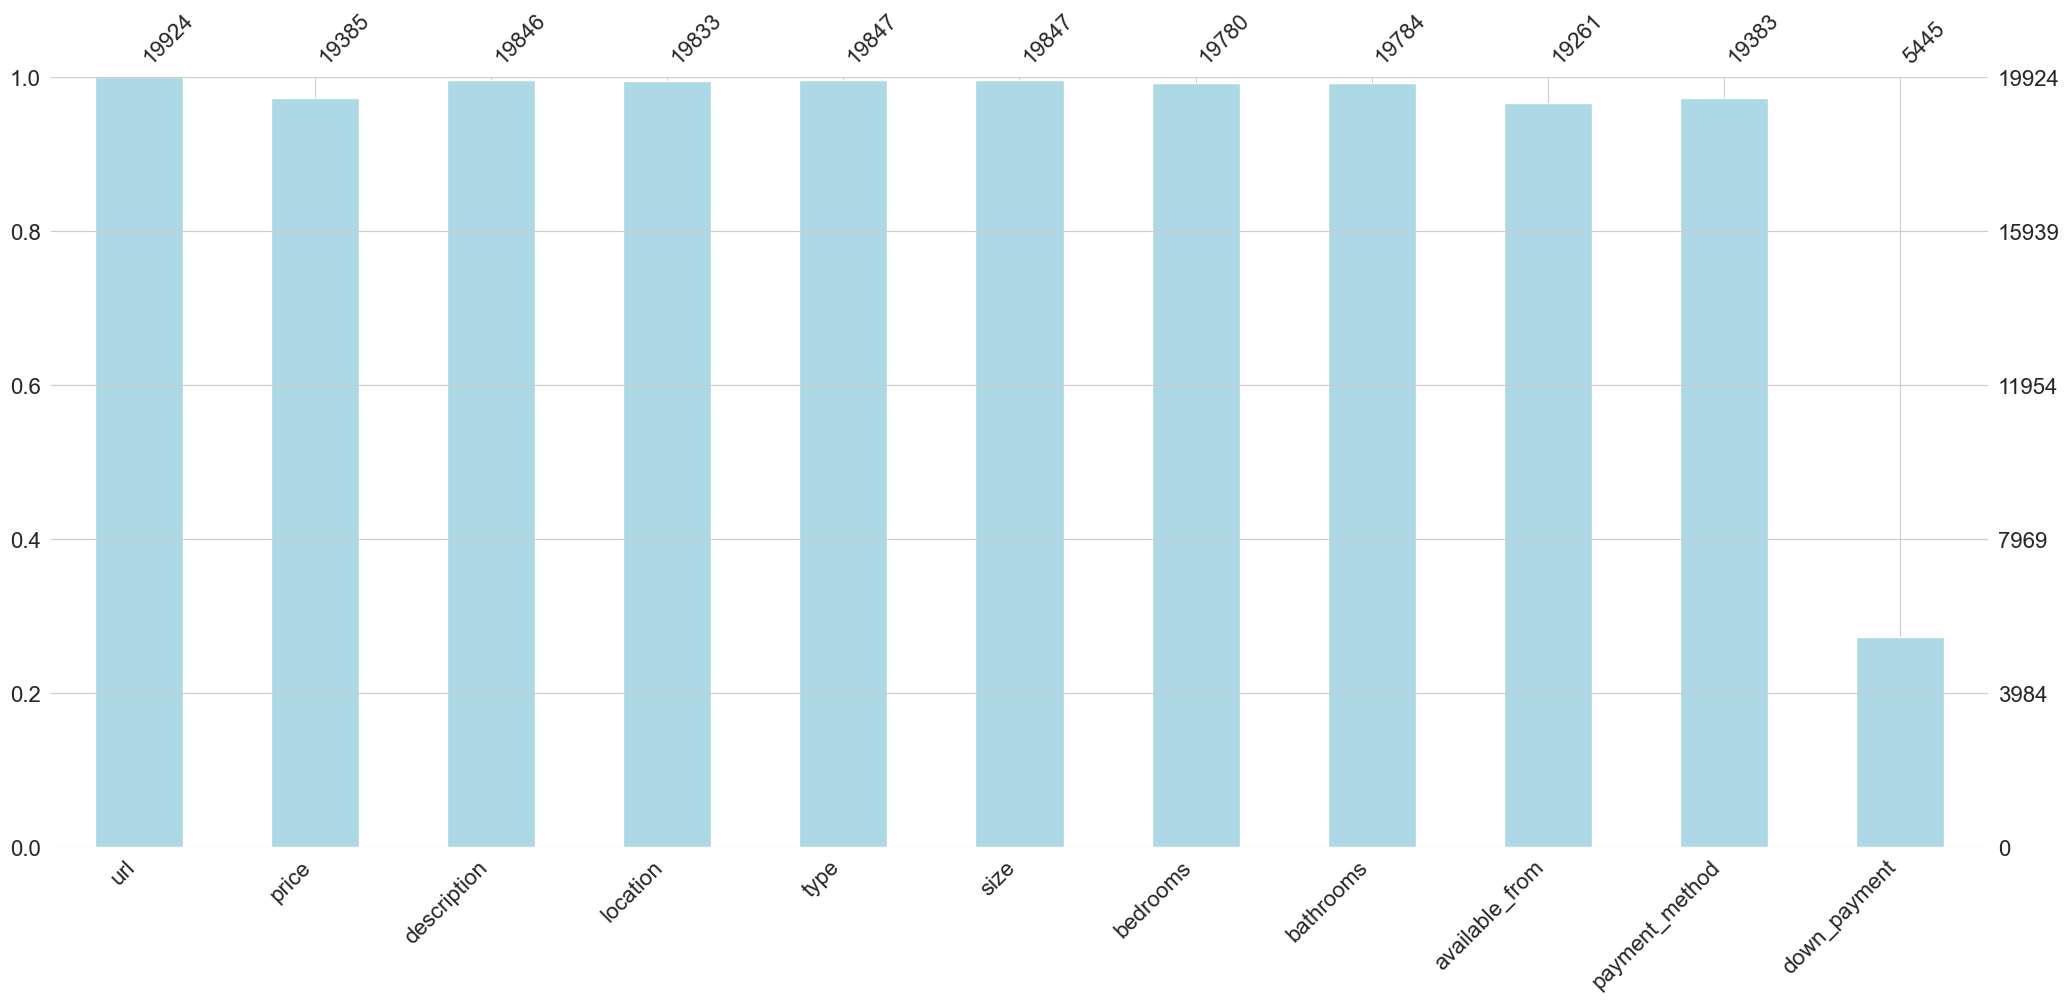

In [47]:
msno.bar(df,color='lightblue')


<Axes: >

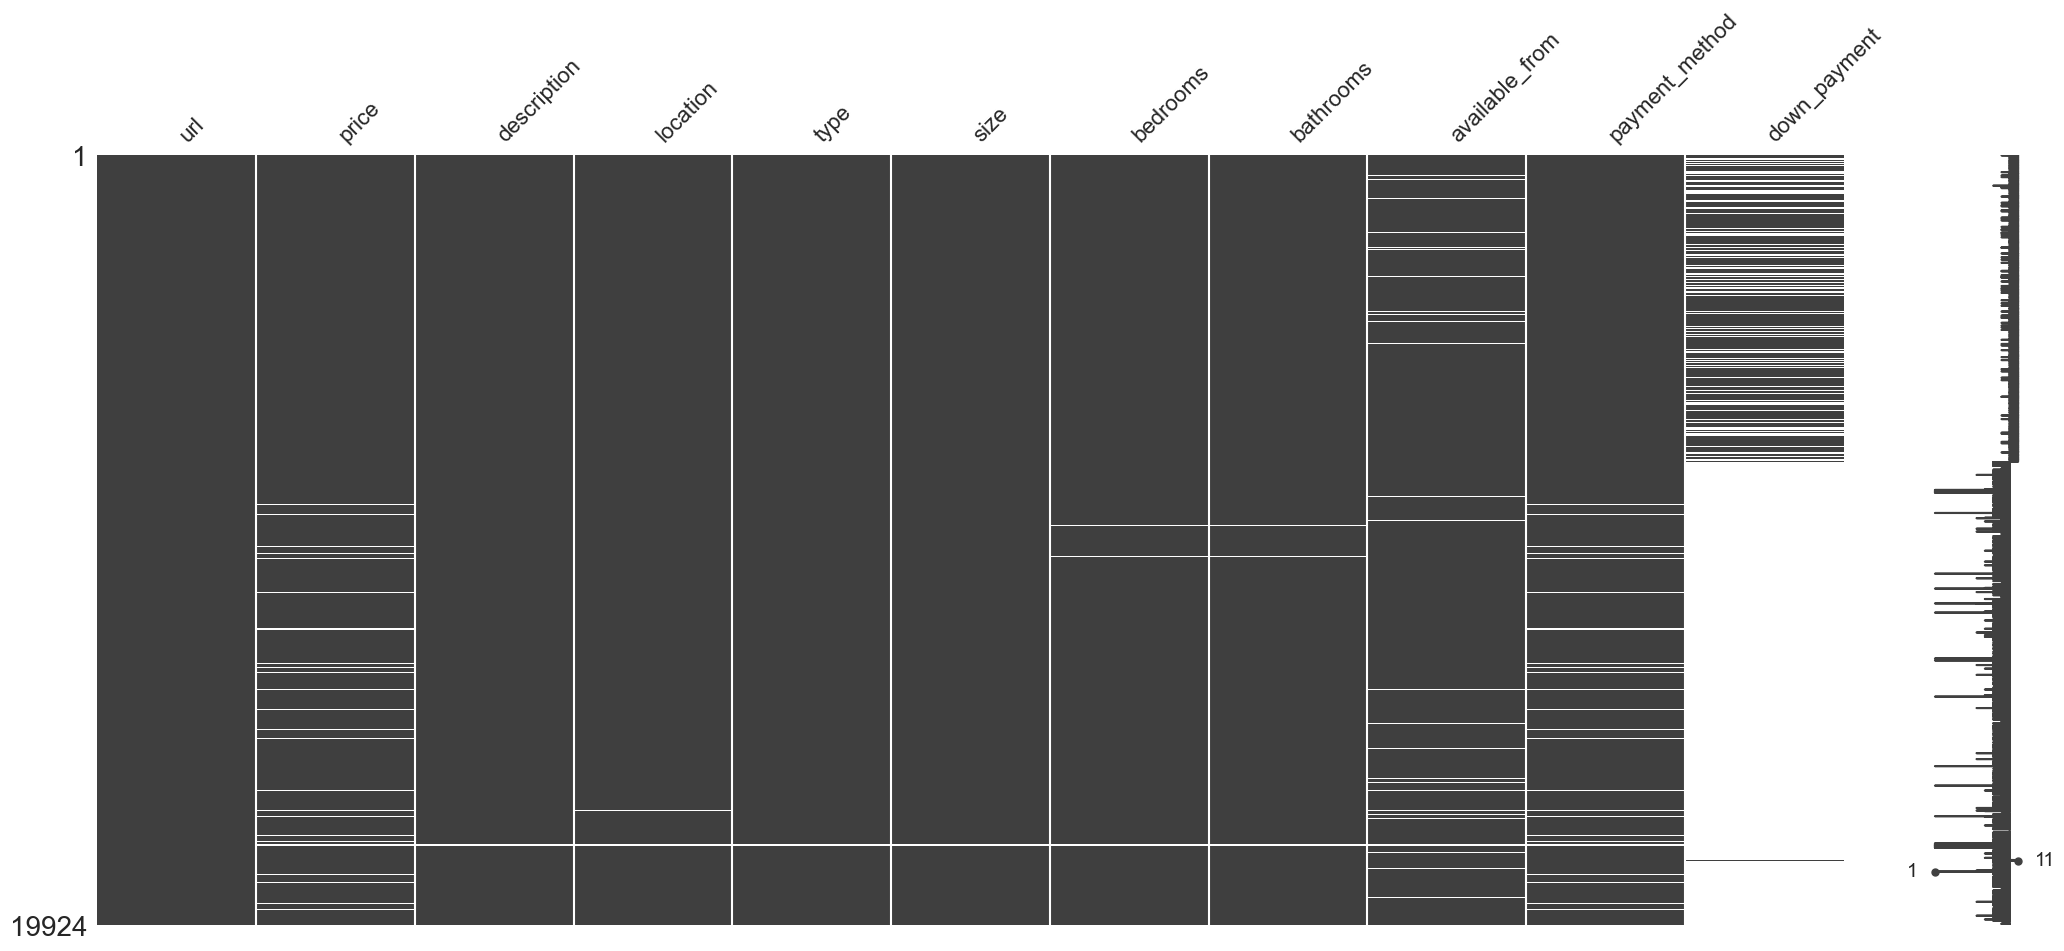

In [48]:
msno.matrix(df)

---

## 5. Data Cleaning and Preprocessing

In this step, we clean and prepare the dataset for analysis.

---

### 5.1 Price Column
- Removed commas in the `price` column.  
- Converted it to numeric values.

---

### 5.2 Removing Unnecessary Columns
- Dropped: `description`, `available_from`, `location`, `url`, and `down_payment`.

---

### 5.3 Location Column
- Removed rows with missing `location`.  
- Split `location` into:
  - **governorate** (last part)  
  - **compound** (first part)  
  - **city** (middle part)

---

### 5.4 Size Column
- Cleaned the `size` column (removed “sqm”, commas, spaces).  
- Converted it to numeric values.  
- Removed properties larger than **1000 sqm** (outliers).  
- Created a new column `size_bin` (size ranges in 50 sqm intervals).

---

### 5.5 Bedrooms and Bathrooms
- Created a `Maid_room` column (1 if maid room exists, 0 otherwise).  
- Standardized `bedrooms`: replaced “studio” with 0, removed “+Maid”, converted to numbers.  
- Converted `bathrooms` to numeric.

---

### 5.6 Imputation (Filling Missing Values)
- Used a function to fill missing values with the **mean of similar groups**.  
- If no group mean is available, used the **global mean**.  
- Applied to: `price`, `bedrooms`, `bathrooms`.

---

### 5.7 Payment Method
- Dropped rows with missing `payment_method`.

---

✅ Now the dataset is cleaned, structured, and ready for further analysis.


In [49]:
# handling columns and data types 
# Handling price column
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
# Remove description column
df.drop('description', axis=1, inplace=True)
# Remove available_from column
df.drop('available_from', axis=1, inplace=True)

In [50]:
# Drop rows with missing location
df.dropna(subset=['location'], inplace=True)

# Split location into parts
df['governorate'] = df['location'].str.split(',').str[-1].str.strip()
df['compound'] = df['location'].str.split(',').str[0].str.strip()
df['city'] = df['location'].str.split(',').apply(
    lambda x: ', '.join([p.strip() for p in x[1:-1]]) if len(x) > 2 else ''
)

# Drop unnecessary columns
df.drop(['location', 'url', 'down_payment'], axis=1, inplace=True)


In [51]:
# Handling Size Column
df['size'] = (
    df['size']
    .str.split('/').str[-1]           
    .str.replace('sqm','', regex=False) 
    .str.replace(',','', regex=False)   
    .str.strip()                       
)
df['size'] = pd.to_numeric(df['size'], errors='coerce')

In [52]:
# Handling Bedrooms Column
df['Maid_room'] = df['bedrooms'].str.contains('Maid', case=False, na=False).astype(int)
# Replace 'studio' and 'Studio' with 0
df['bedrooms'] = df['bedrooms'].replace({'studio': 0, 'Studio': 0})
df['bedrooms'] = df['bedrooms'].str.replace(r'(\d+)\+', r'\1', regex=True)
df['bedrooms'] = df['bedrooms'].str.replace(r'\+?\s*Maid', '', regex=True).str.strip()
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')
# Convert bathrooms column to numeric
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')


In [53]:
# Handling Outliers for size column
df = df[df['size'] < 1000]

In [54]:
# Create a new column called "size_bin"
bins = np.arange(0, 1050, 50)  
labels = [f"{i}-{i+50}" for i in range(0, 1000, 50)]
df['size_bin'] = pd.cut(df['size'], bins=bins, labels=labels, right=False)

In [55]:
# Function for grouped imputation with global fallback
def grouped_imputation(df, target_col, group_cols):
    global_mean = df[target_col].mean() 
    df[target_col] = df.groupby(group_cols, observed=False)[target_col] \
                       .transform(lambda x: x.fillna(x.mean() if not x.dropna().empty else global_mean))
    return df

df = grouped_imputation(df, 'price', ['size_bin', 'type', 'compound'])
df = grouped_imputation(df, 'bedrooms', ['size_bin', 'type', 'governorate'])
df = grouped_imputation(df, 'bathrooms', ['size_bin', 'type', 'governorate'])




In [56]:
# Drop missing rows for payment_method
df.dropna(subset=['payment_method'], inplace=True)

---

## 6. Memory Optimization

To make the dataset more efficient:

- Checked memory usage before optimization.  
- Converted string columns with few unique values to **category**.  
- Downcasted numeric columns to smaller types.  
- Checked memory usage after optimization.

This step reduces memory usage and improves performance.


In [57]:
# Check memory usage to optimize
mem_before = df.memory_usage(deep=True).sum() /1024**2
print (f"Memory usage before Optimization {mem_before.round(3)} MB")

Memory usage before Optimization 6.572 MB


In [58]:
for col in df.select_dtypes(include='object').columns:
    if df[col].nunique() / len(df[col]) <0.5:
        df[col] = df[col].astype('category')
for col in df.select_dtypes(include=['int64','float64']).columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col]=pd.to_numeric(df[col],downcast='integer')
    else:
        df[col]= pd.to_numeric(df[col],downcast='float')    
mem_after = df.memory_usage(deep=True).sum() /1024**2
print (f"Memory usage after Optimization {mem_after.round(3)} MB")

Memory usage after Optimization 0.868 MB


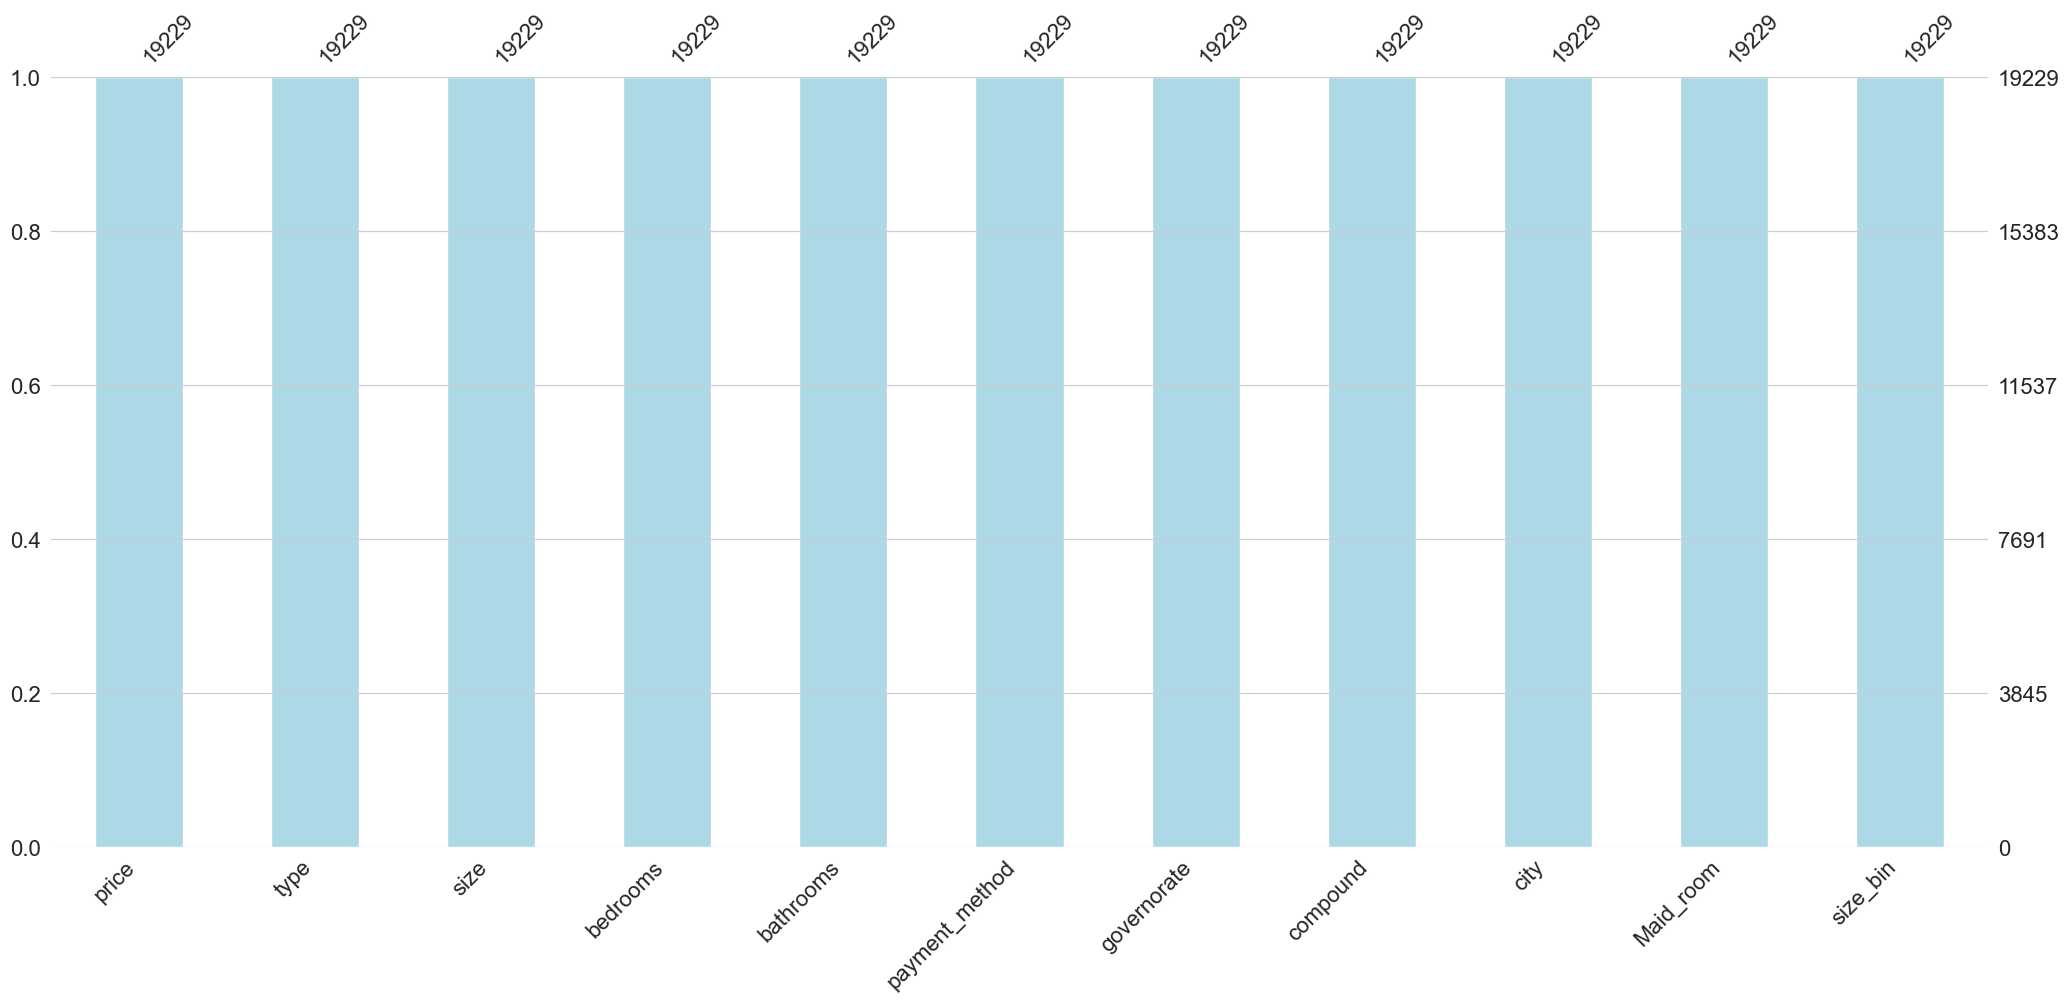

In [59]:
# Visualize missing values after imputation
msno.bar(df,color = 'lightblue')
plt.show()

In [60]:
df.columns

Index(['price', 'type', 'size', 'bedrooms', 'bathrooms', 'payment_method',
       'governorate', 'compound', 'city', 'Maid_room', 'size_bin'],
      dtype='object')

---

## 7. Univariate Analysis (Numerical Variables)

We checked the distribution of the main numerical columns:

- `price`  
- `size`  
- `bedrooms`  
- `bathrooms`  

For each variable, we plotted a histogram with a density curve.  
This shows how the values are spread, where most data points lie, and possible outliers.


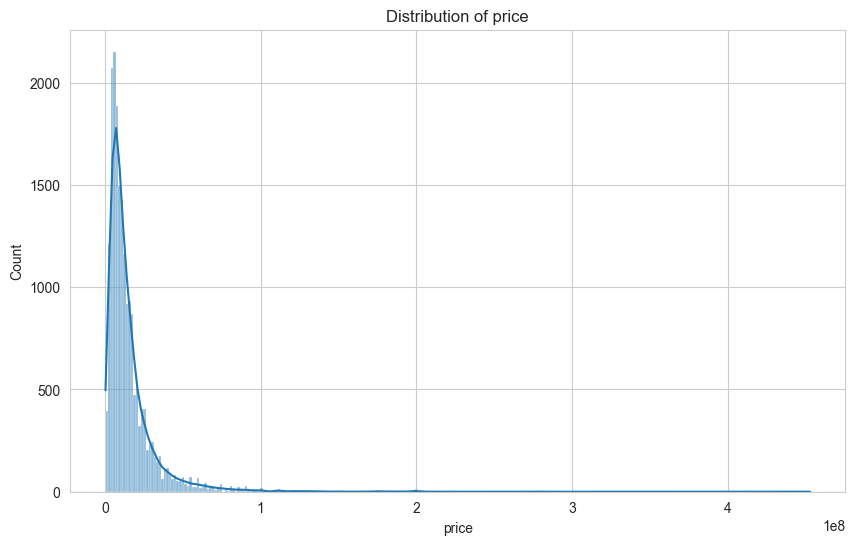

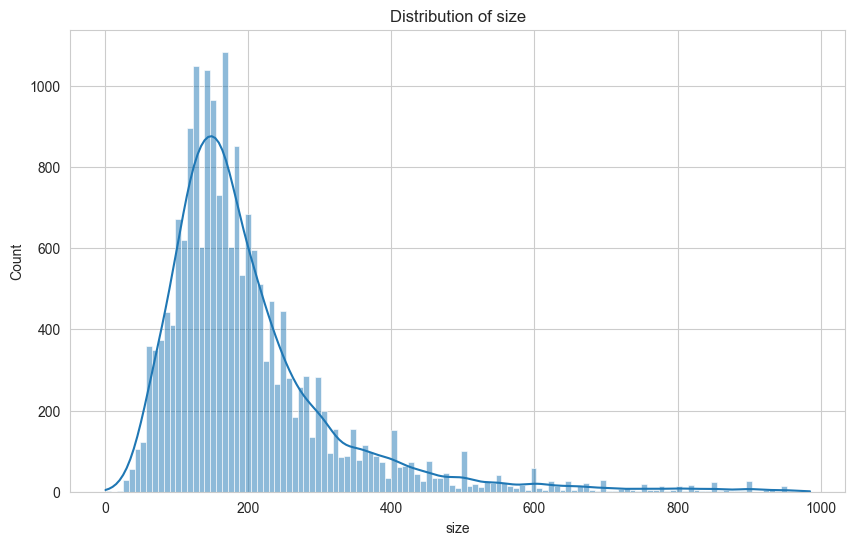

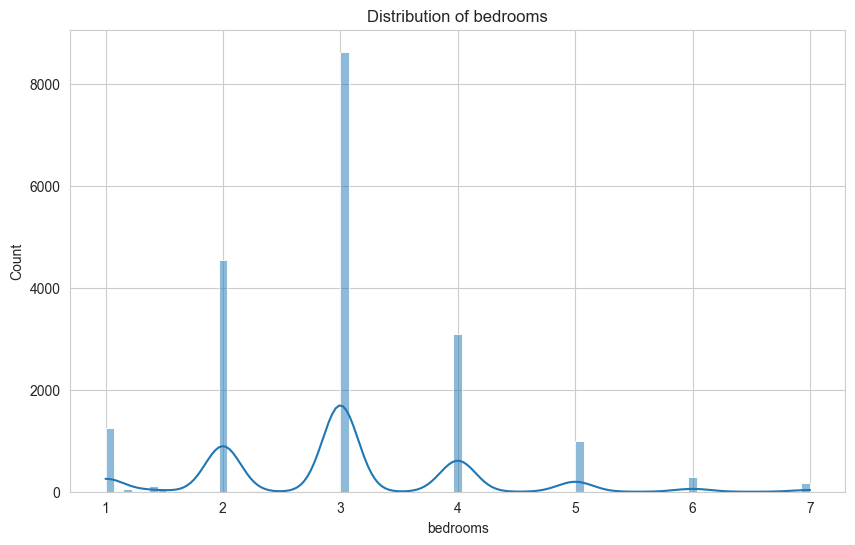

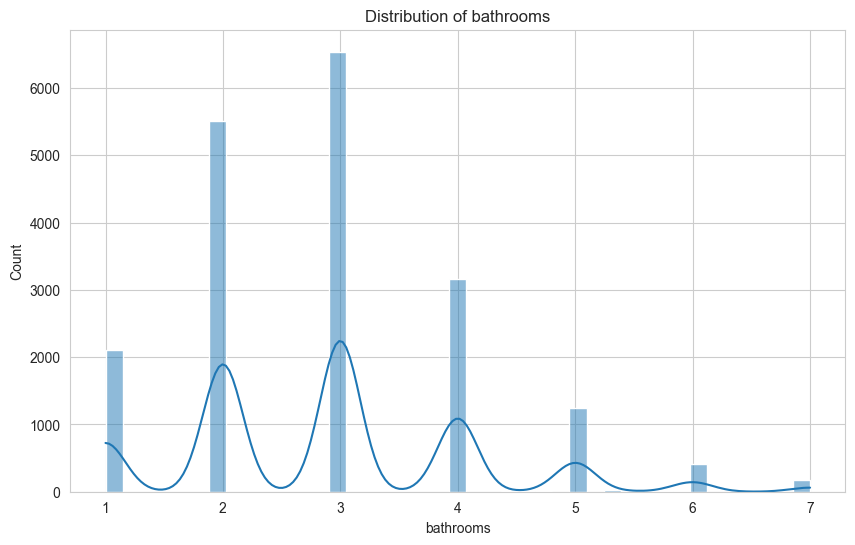

In [61]:
# Univariate analysis

# Numerical variables
numerical_vars = ['price', 'size', 'bedrooms', 'bathrooms']
for var in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

## Property Data Insights

### Bedrooms & Bathrooms
- Most properties have **2 or 3 bedrooms and bathrooms**.  
- The highest concentration is at **3 rooms**.  
- Properties with more than 4 rooms are less common.  

### Property Size
- Most properties fall between **100–200 square units**.  
- The distribution is **right-skewed**, with a few much larger properties acting as outliers.  

### Property Price
- Most properties are at the **lower end of the price range**.  
- The distribution is **heavily right-skewed**, with a few extremely high-priced outliers.  


---

## 8. Outlier Detection (Numerical Variables)

We used boxplots to check for outliers in the numerical columns:

- `price`  
- `size`  
- `bedrooms`  
- `bathrooms`  

Boxplots help to see the spread of the data and highlight extreme values that fall outside the normal range.


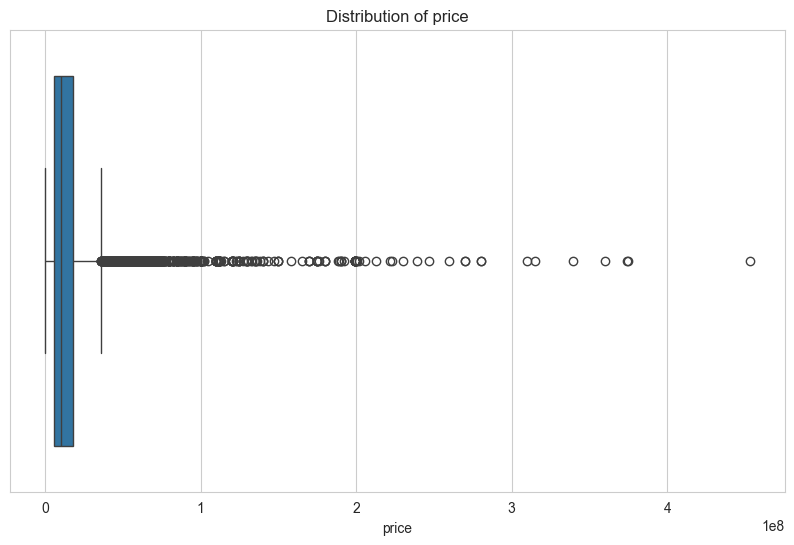

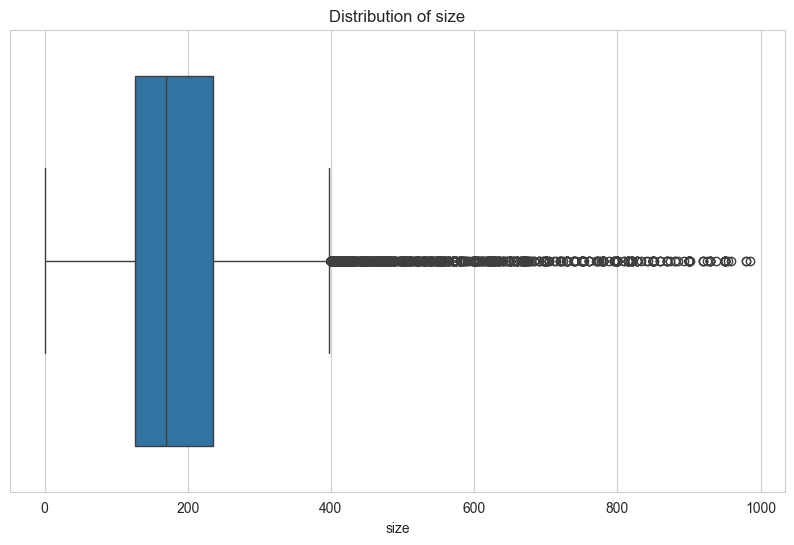

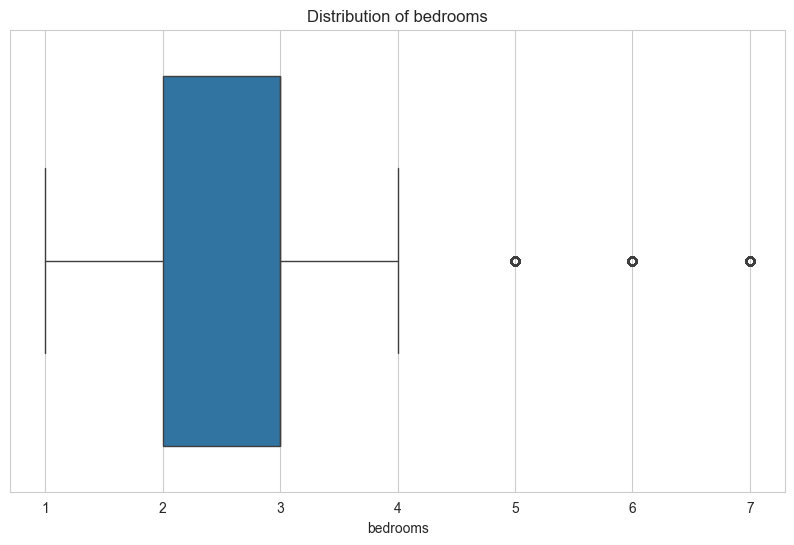

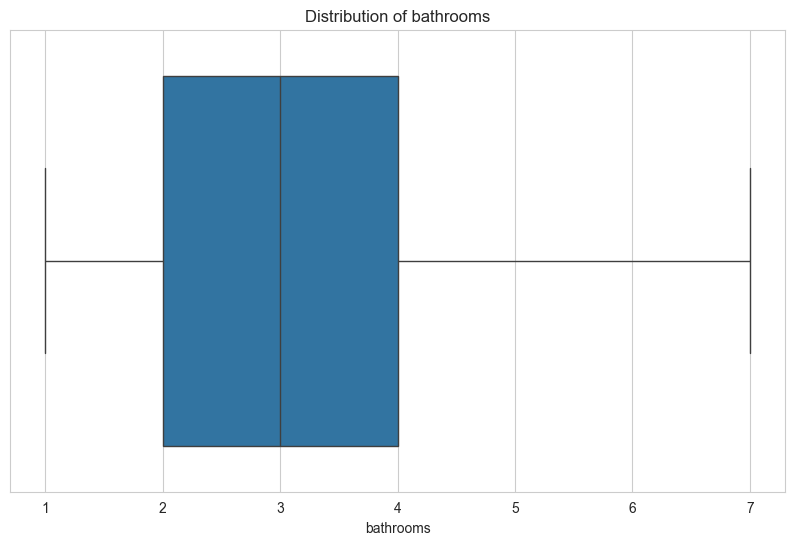

In [62]:
# check Outliers for numerical columns
for var in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=var)
    plt.title(f'Distribution of {var}')
    plt.show()

## Outliers in Real Estate Data

In real estate, outliers are not always errors — they are often **part of the story**.  
Luxury villas, premium compounds, or very affordable units can look like "extreme values," but they represent real segments of the market.  

- **Keep valid outliers** → They show the range from affordable to luxury properties.  
- **Remove only clear mistakes** → For example, unrealistic prices or sizes.  
- **Use transformations (like log price)** → To reduce skewness while keeping valuable information.  

 Unlike other datasets, outliers in real estate provide important insights into the market, so they should be handled carefully, not blindly removed.


---

## 9. Univariate Analysis (Categorical Variables)

We examined the distribution of the main categorical columns:

- `type`  
- `payment_method`  
- `governorate`  
- `Maid_room`  
- `size_bin`  

Count plots were used to show how often each category appears.  
This helps identify the most common property types, payment methods, regions, and size ranges.


/var/folders/py/t6t6f6jn3592lg1vkpmfz4nc0000gn/T/ipykernel_1195/119226424.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var,palette='Set2')


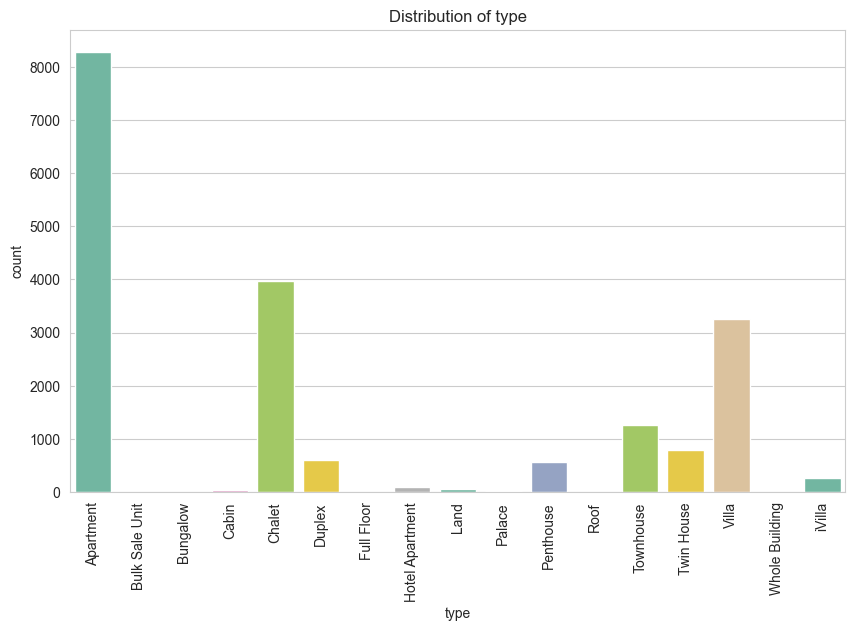

/var/folders/py/t6t6f6jn3592lg1vkpmfz4nc0000gn/T/ipykernel_1195/119226424.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var,palette='Set2')


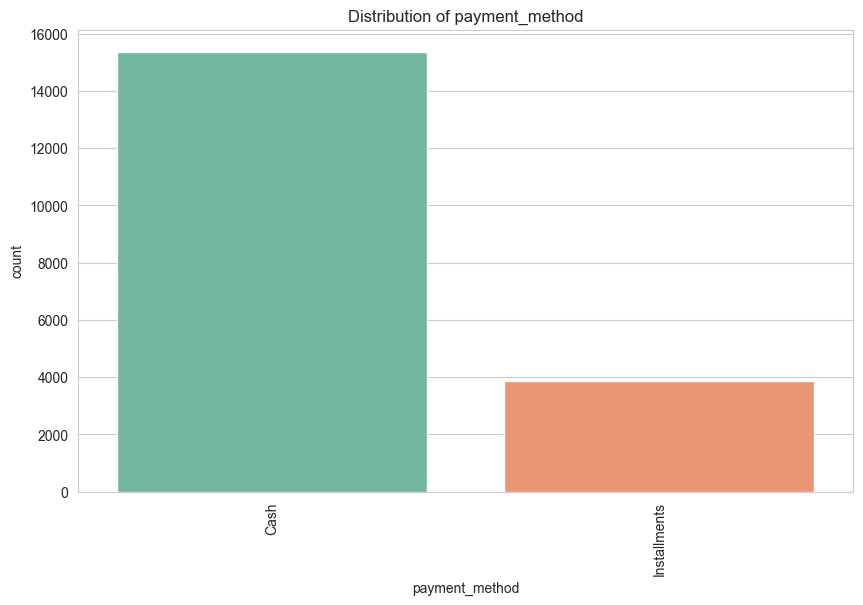

/var/folders/py/t6t6f6jn3592lg1vkpmfz4nc0000gn/T/ipykernel_1195/119226424.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var,palette='Set2')


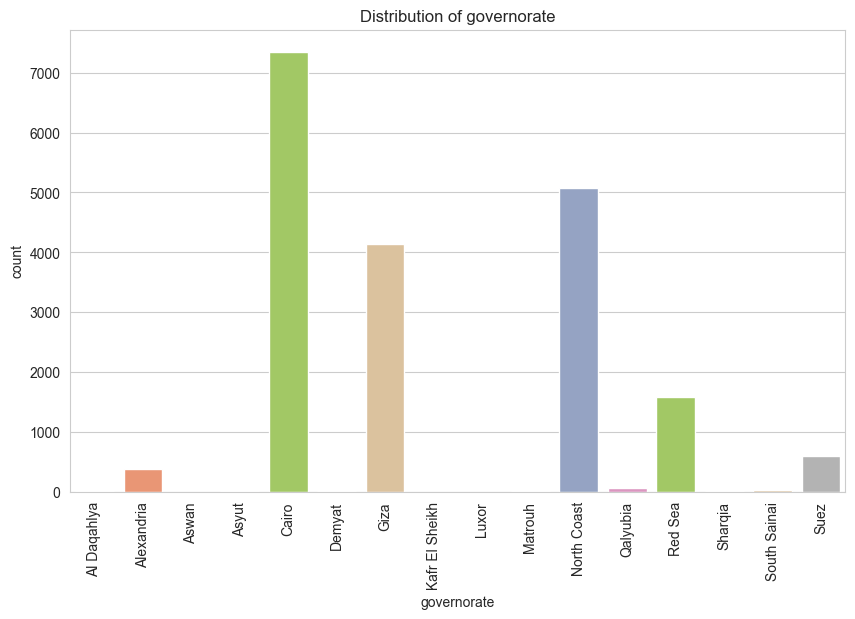

/var/folders/py/t6t6f6jn3592lg1vkpmfz4nc0000gn/T/ipykernel_1195/119226424.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var,palette='Set2')


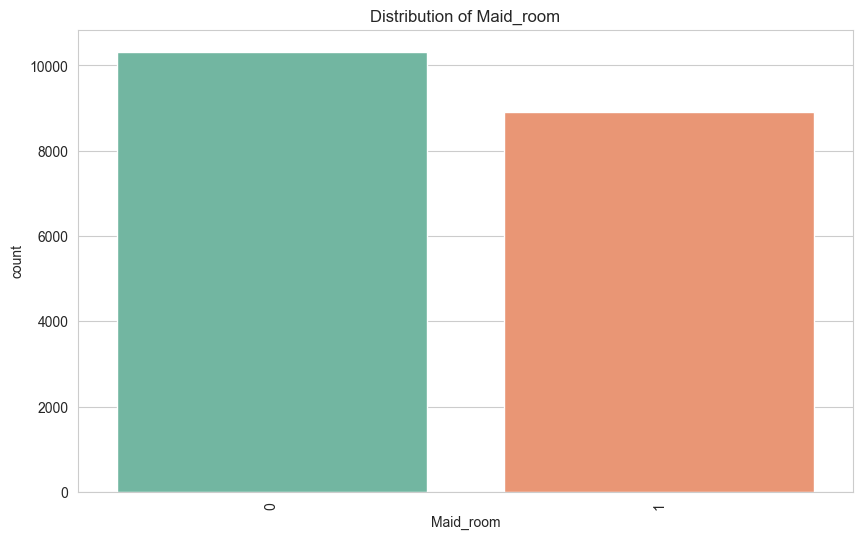

/var/folders/py/t6t6f6jn3592lg1vkpmfz4nc0000gn/T/ipykernel_1195/119226424.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var,palette='Set2')


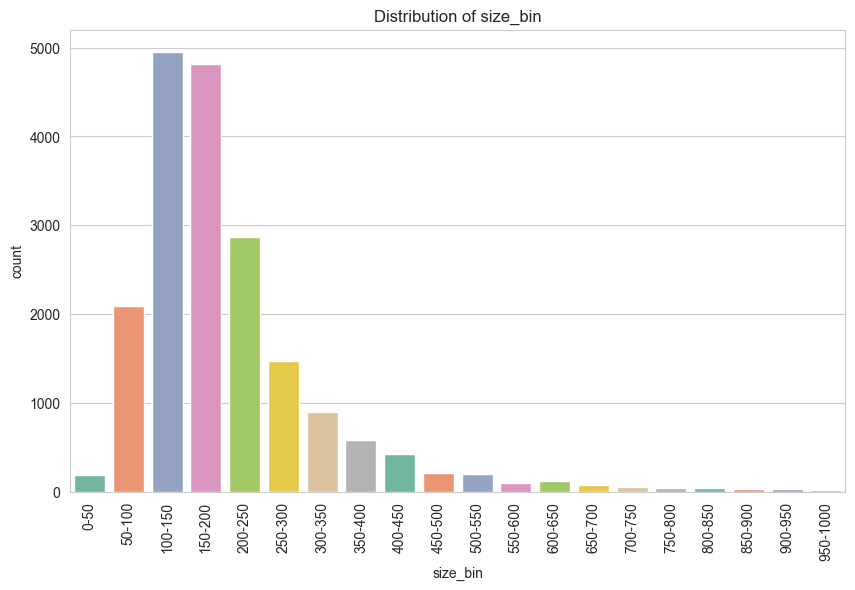

In [63]:
# Categorical variables
categorical_vars = ['type', 'payment_method', 'governorate','Maid_room', 'size_bin']
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=var,palette='Set2')
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=90)
    plt.show()

## Property Data Insights

### Property Type and Size
- **Property Types:** Apartments are the most common, followed by Chalets and Villas. Other property types appear much less frequently.  
- **Property Size:** Most properties are between **100–200 square units**, with size categories **100–150** and **150–200** being the most frequent.  

### Rooms and Amenities
- **Bedrooms & Bathrooms:** The most common counts are **3**, followed by **2**. Properties with more than 4 rooms are uncommon.  
- **Maid Rooms:** Nearly an even split, with slightly more properties **without** a maid’s room.  

### Geographic and Financial Data
- **Governorates:** Cairo has the most properties, followed by the North Coast and Giza. Other regions (e.g., Alexandria, Suez, Red Sea) have fewer listings.  
- **Payment Methods:** **Cash payments** are more frequent than installments.


---

## Bivariate Analysis: Numerical Variables vs. Price  

We explore how each numerical variable relates to property price using scatter plots with trend lines.  
The variables analyzed are:  

- **Size vs. Price**  
- **Bedrooms vs. Price**  
- **Bathrooms vs. Price**  

This helps visualize potential relationships and correlations between property features and pricing.  


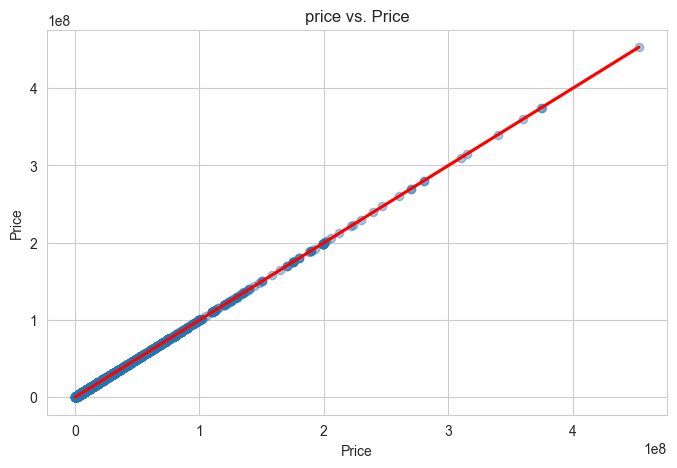

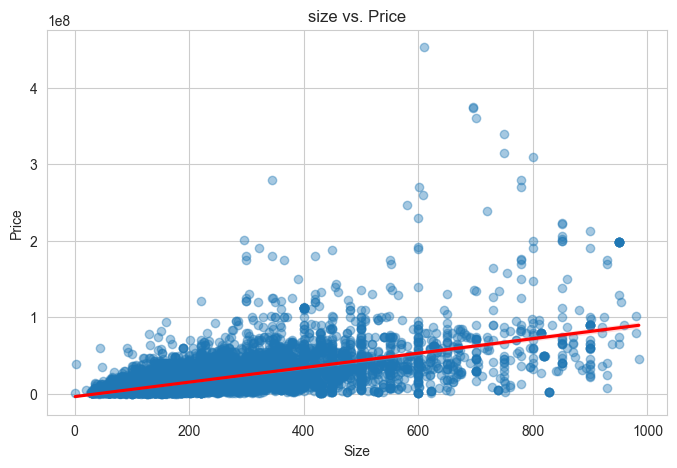

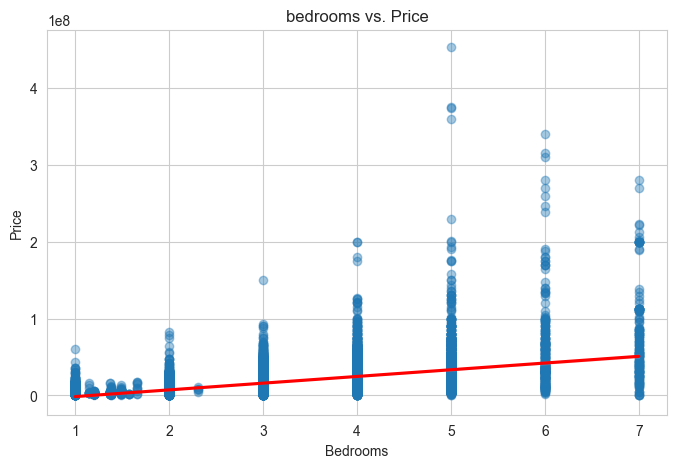

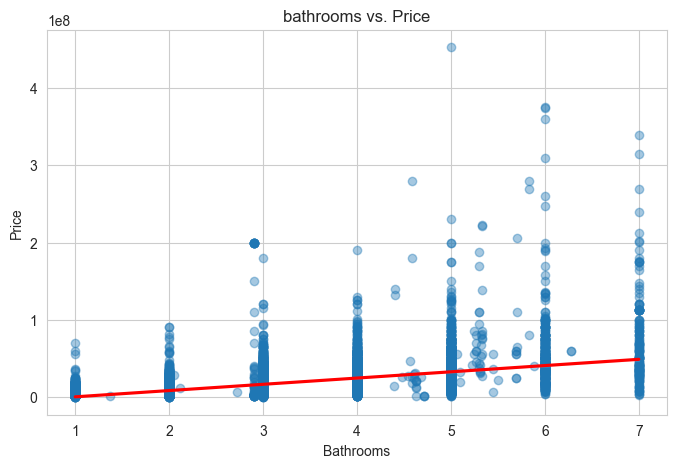

In [64]:
# Bivariate Analysis: Numerical Variables vs. Price
for var in numerical_vars:
    plt.figure(figsize=(8, 5))
    sns.regplot(data=df, x=var, y='price', scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
    plt.title(f'{var} vs. Price')
    plt.xlabel(var.capitalize())
    plt.ylabel('Price')
    plt.show()


## Property Data Analysis: Key Relationships

### Price and Property Characteristics
- **Size vs. Price:** Larger properties generally cost more, showing a clear positive correlation. However, prices vary widely for the same size, influenced by factors like location, type, and amenities. Outliers are present, especially at the higher end.  
- **Bedrooms vs. Price:** More bedrooms are usually associated with higher prices, but there is a wide price range within each bedroom count. Outliers are notable for properties with 5+ bedrooms.  
- **Bathrooms vs. Price:** Similar to bedrooms, more bathrooms tend to increase property price. Still, prices vary significantly for the same bathroom count, with clear outliers at higher values.  


---

## Price vs. Payment Method  

We compare property prices across different payment methods using a boxplot.  
This helps visualize how payment type (e.g., cash or installment) relates to price distribution.  


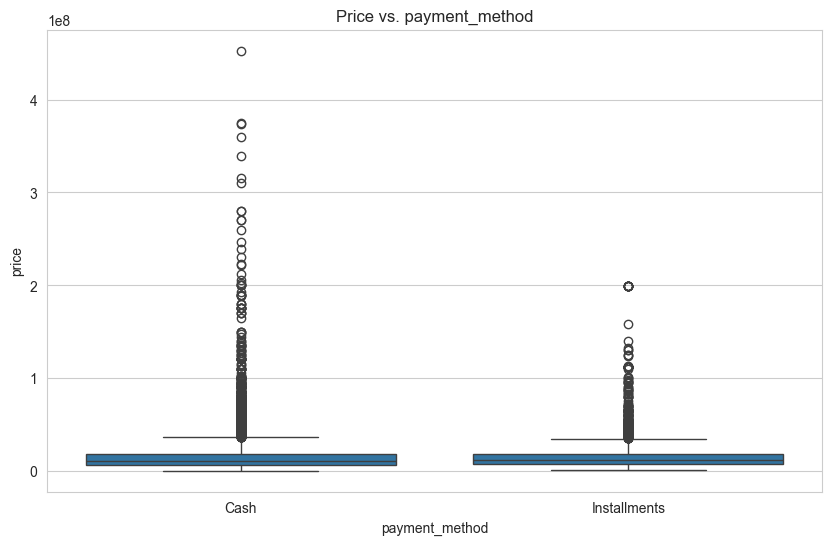

In [65]:
# Price vs. payment_method
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='payment_method', y='price')
plt.title('Price vs. payment_method')
plt.show()

### Price and Payment Method
- **Cash vs. Installments:** Median prices are similar for both methods.  
- **Cash Payments:** Show a wider price distribution with significantly higher-value outliers, indicating that the most expensive properties are almost always bought with cash.  
- **Installments:** Used across a wide range of properties but less common for very high-priced real estate.  


---

## Price vs. Governorate  

A barplot shows the average property price across governorates, ordered by the number of listings.  
This highlights regional differences in property values and identifies high- and low-price areas.  

## Price vs. Property Type  

A barplot compares average prices across property types (e.g., Apartments, Villas, Chalets).  
This helps reveal which property categories are generally more expensive.  


/var/folders/py/t6t6f6jn3592lg1vkpmfz4nc0000gn/T/ipykernel_1195/2461891911.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='governorate', y='price', order=df['governorate'].value_counts().index,palette='Set3')


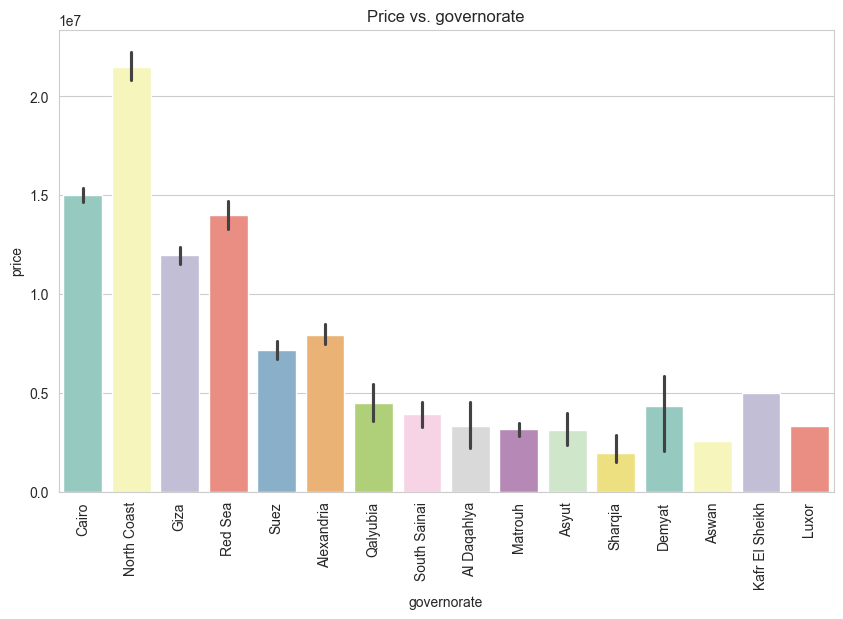

/var/folders/py/t6t6f6jn3592lg1vkpmfz4nc0000gn/T/ipykernel_1195/2461891911.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='type', y='price',palette='Set2')


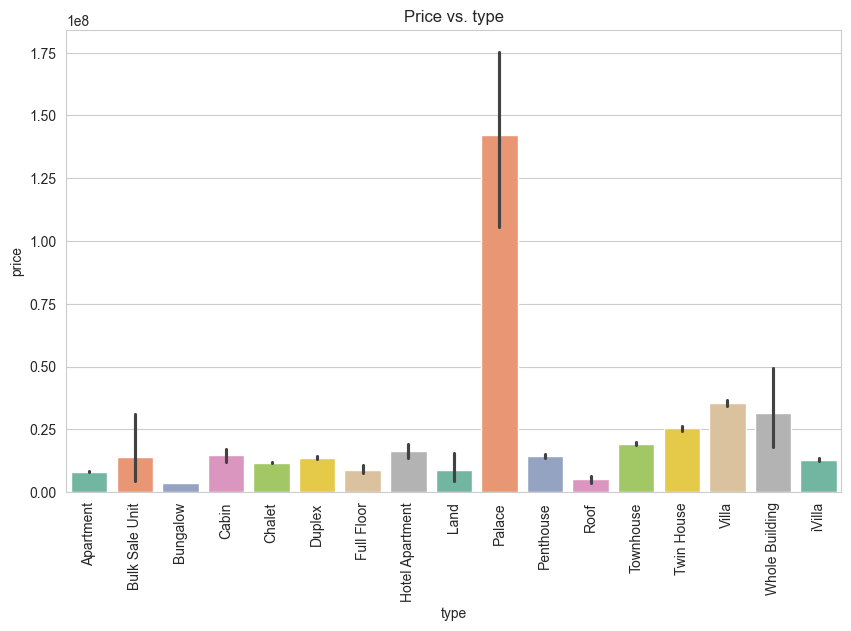

In [66]:
# Price vs. governorate boxplot ordered by median
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='governorate', y='price', order=df['governorate'].value_counts().index,palette='Set3')
plt.title('Price vs. governorate')
plt.xticks(rotation=90)
plt.show()
# Price vs. type 
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='type', y='price',palette='Set2')
plt.title('Price vs. type')
plt.xticks(rotation=90)
plt.show()

### Price vs. Property Type and Location
- **By Property Type:** Palaces are the most expensive, with average prices far above all other categories. Villas and Whole Buildings also have high averages, while Apartments and Townhouses are much lower. Large error bars for Palaces and Whole Buildings suggest a few extremely high-value properties drive up the average.  
- **By Governorate:** North Coast has the highest average property prices, followed by Cairo and the Red Sea. Giza comes next, while other governorates (e.g., Asyut, Al Daqahliyah, Luxor) show much lower averages. This highlights the strong impact of location on property value.  


---

## Multivariate Analysis: Median Price by Governorate and Type  

This barplot compares the **median property prices** across governorates, further broken down by **property type** (e.g., Apartment, Villa, Chalet).  
It helps identify how location and property type interact to influence prices, showing which regions and property types dominate the high- or low-price segments.  


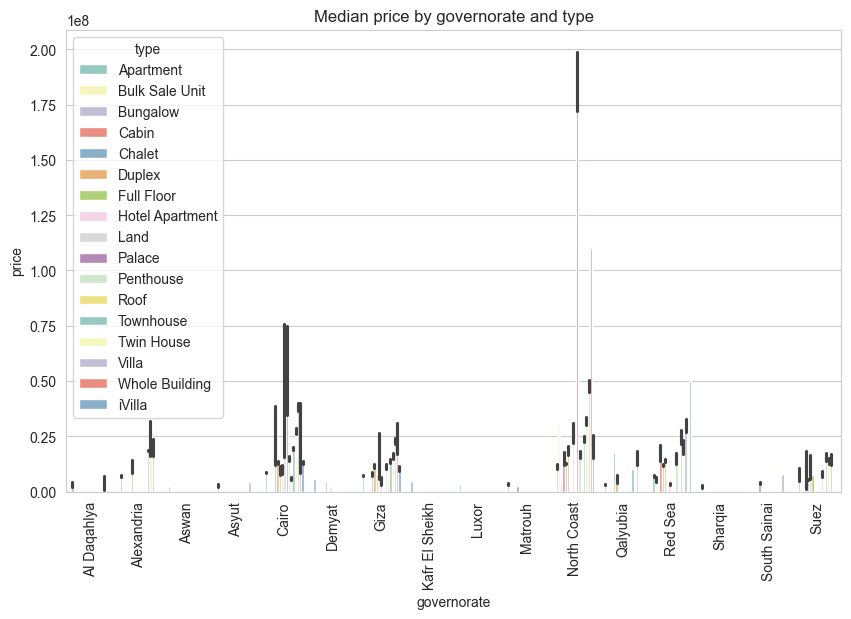

In [67]:
# Multivariate analysis
# Compare median price by governorate and type
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='governorate', y='price', hue='type',palette='Set3')
plt.title('Median price by governorate and type')
plt.xticks(rotation=90)
plt.show()

### Key Insights from Median Price by Governorate and Type

- **Cairo and North Coast Lead in Prices:**  
  Cairo shows the highest median prices across multiple property types (especially Villas and Whole Buildings, up to ~EGP 75M).  
  The North Coast also records very high values, particularly for Villas, Chalets, and Penthouses, with some exceeding **EGP 150M**.  

- **Diversity of Property Types:**  
  Cairo and the North Coast offer a wide variety of property types, while regions like Aswan and Asyut show more limited options, reflecting differences in market maturity and demand.  

- **Regional Concentration of Property Types:**  
  Chalets and Villas are concentrated in coastal/tourist areas (North Coast, Red Sea).  
  Apartments and Whole Buildings dominate major cities (Cairo, Alexandria), serving as primary residences and commercial spaces.  

- **Price Variation Within Governorates:**  
  Property prices vary widely by type even within the same governorate.  
  For example, Villas in Cairo have a much higher median price compared to Apartments, showing strong differences by property category.  


---

## Price per Square Meter (sqm) Analysis  

To measure **true cost efficiency**, we calculate the **price per sqm** for each property.  
This reveals which regions, cities, and compounds are the most expensive relative to their size.  

### Governorates  
- Barplot shows governorates ranked by **median price per sqm**.  
- Coastal and premium areas typically dominate the high end.  

### Cities (Top 15)  
- Focus on the **top 15 cities** with the highest median price per sqm.  
- Highlights urban hotspots and premium city markets.  

### Compounds (Top 15)  
- Shows the **top 15 compounds** ranked by median price per sqm.  
- Identifies luxury compounds versus more affordable clusters.  


/var/folders/py/t6t6f6jn3592lg1vkpmfz4nc0000gn/T/ipykernel_1195/3546028208.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gov_order= df.groupby('governorate')['price_per_sqm'].median().sort_values(ascending=False)
/var/folders/py/t6t6f6jn3592lg1vkpmfz4nc0000gn/T/ipykernel_1195/3546028208.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gov_order.index, y=gov_order.values,palette='Set3')


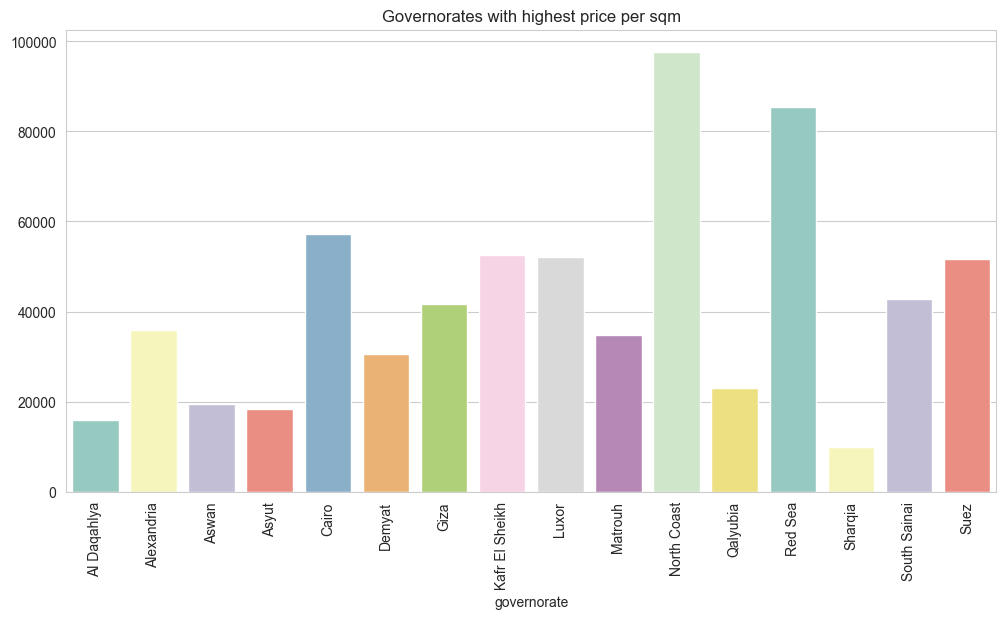

In [76]:
# Which governorates have the **highest price per sqm** (true cost efficiency)?
# Create price per sqm column
df['price_per_sqm'] = df['price'] / df['size']
# 1- Governorates with highest price per sqm
gov_order= df.groupby('governorate')['price_per_sqm'].median().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=gov_order.index, y=gov_order.values,palette='Set3')
plt.title('Governorates with highest price per sqm')
plt.xticks(rotation=90)
plt.show()


### Insights from "Governorates with Highest Price per sqm"
- **Coastal Regions Dominate:** North Coast and Red Sea lead with the highest median prices per sqm, driven by demand for vacation and secondary homes.  
- **Cairo’s Position:** Cairo remains high but below coastal areas, reflecting dynamics of primary residences versus resort properties.  
- **Regional Variability:** Prices vary greatly across governorates, with areas like Al Daqahliya and Sharqia showing much lower values.

---

## Correlation Analysis  

A **correlation heatmap** is used to explore the relationships between numerical variables.  
This helps identify which features are strongly related to each other, and especially how they relate to **price**.  

- Positive values (closer to **1.0**) indicate a **direct relationship** (as one increases, the other tends to increase).  
- Negative values (closer to **-1.0**) indicate an **inverse relationship** (as one increases, the other tends to decrease).  
- Values near **0** show little or no linear relationship.  


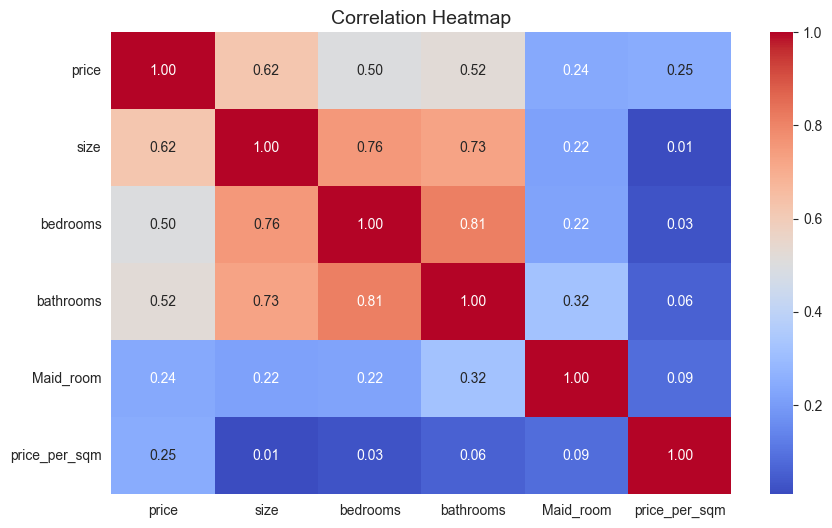

In [69]:
corr = df.corr(numeric_only=True)

# Set figure size (bigger = more readable)
plt.figure(figsize=(10, 6))  

# Draw heatmap
sns.heatmap(
    corr, 
    annot=True,           # show numbers
    fmt=".2f",            # round to 2 decimals
    cmap="coolwarm",      # color scheme
    cbar=True,            # show color bar
    annot_kws={"size":10} # control font size of numbers
)

plt.title("Correlation Heatmap", fontsize=14)
plt.show()

### Key Insights from the Correlation Heatmap

- **Price & Size:** Strong positive correlation (**0.62**). Larger properties generally have higher prices.  
- **Bedrooms & Bathrooms:** Highest correlation in the dataset (**0.81**). Properties with more bedrooms usually have more bathrooms.  
- **Size & Rooms:** Size is strongly correlated with both bedrooms (**0.76**) and bathrooms (**0.73**), making it a good predictor of room counts.  
- **Maid’s Room:** Weak correlations overall. Its strongest link is with bathrooms (**0.32**), showing it is not a major factor in price or size.  


---

In [70]:
# Show the top compound in each governorate based on price
for governorate in df['governorate'].unique():
    compound = df[df['governorate'] == governorate]['compound'].value_counts().idxmax()
    print(f"The top compound in {governorate} is {compound}")

The top compound in Red Sea is Mangroovy Residence
The top compound in Giza is O West
The top compound in North Coast is Marassi
The top compound in Cairo is Mountain View iCity
The top compound in Suez is IL Monte Galala
The top compound in Qalyubia is Obour City
The top compound in Alexandria is Alex West
The top compound in South Sainai is Matarma Beach Residence
The top compound in Sharqia is 10th of Ramadan City
The top compound in Al Daqahlya is Gadeela Area
The top compound in Matrouh is Bahya
The top compound in Demyat is Boyot New Damietta
The top compound in Aswan is New Aswan
The top compound in Asyut is Nyoum Asyut
The top compound in Luxor is Sequoia Luxor
The top compound in Kafr El Sheikh is Marina Delta


In [77]:
# Save the cleaned data
df.to_csv('cleaned_data.csv', index=False)

---